# Ejercicio Regresión.

El objetivo de este ejercicio es analizar y crear modelos de  regresión a partir del dataset Car Prices, con el fin de obtener predicciones sobre el __precio__ de un vehiculo. 



Ejercicios: 
1. Realizar un EDA del dataset. Detalla las conclusiones que considere más importantes. 
2. Realizar las modificaciones al dataset pertinentes. (Ej: Imputar nulos, eliminar variables, corregir valores, etc.)
3. Crear un modelo de regresión lineal con una sola variable, la que mejor resultados obtenga. Para realizar comparativas, utilice la métrica MAE. 
4. Crear un modelo de regresión lineal (sin limitaciones de variables)
5. Probar con otros modelos de regresión. 
6. Determinar cual es el mejor modelo de los que ha probado, explicando el por qué. 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [10]:
car = pd.read_csv("C:\\Users\\arica\\Desktop\\Mi primer proyecto\\Alumno\\DSPT_TBS_SVL_0922\\3-Machine_Learning\\1-Supervisado\\1-Regression\\ejercicio\\CarPrice_Assignment.csv")

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
car.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [17]:
car.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [18]:
car.doornumber.unique()

array(['two', 'four'], dtype=object)

In [19]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:>

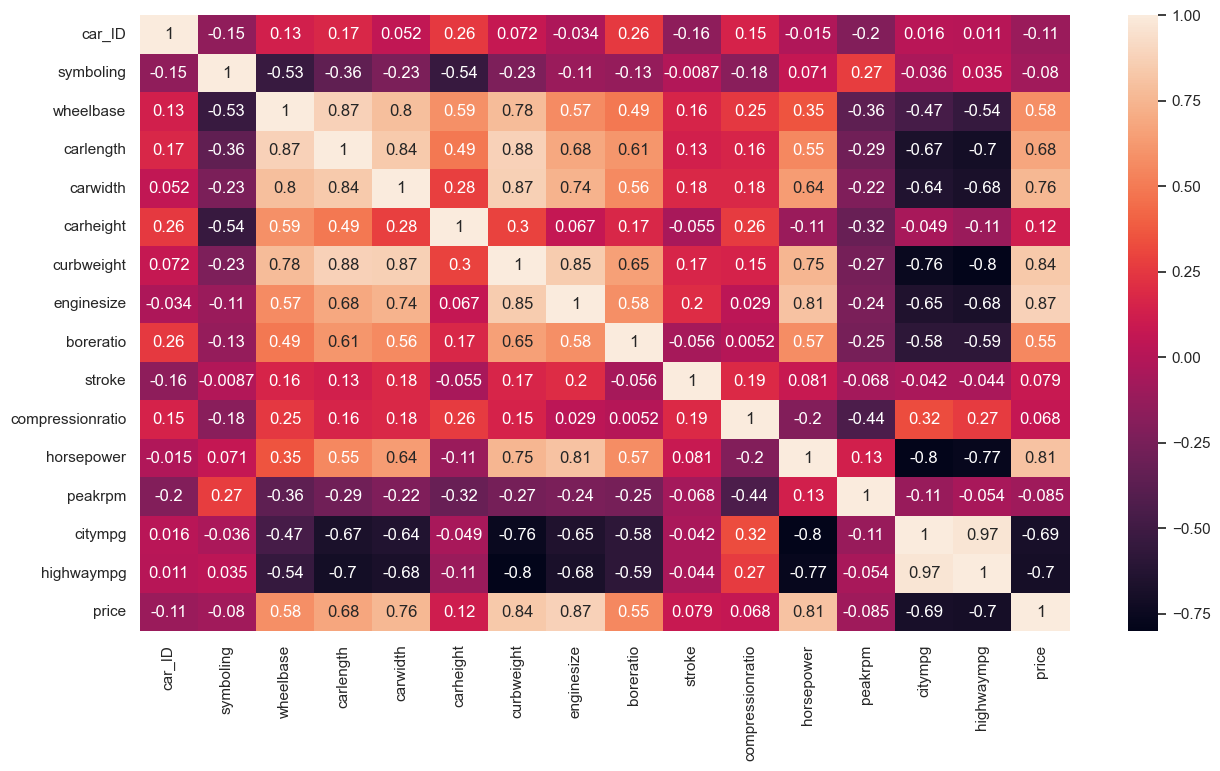

In [20]:
sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(car.corr(), annot=True)

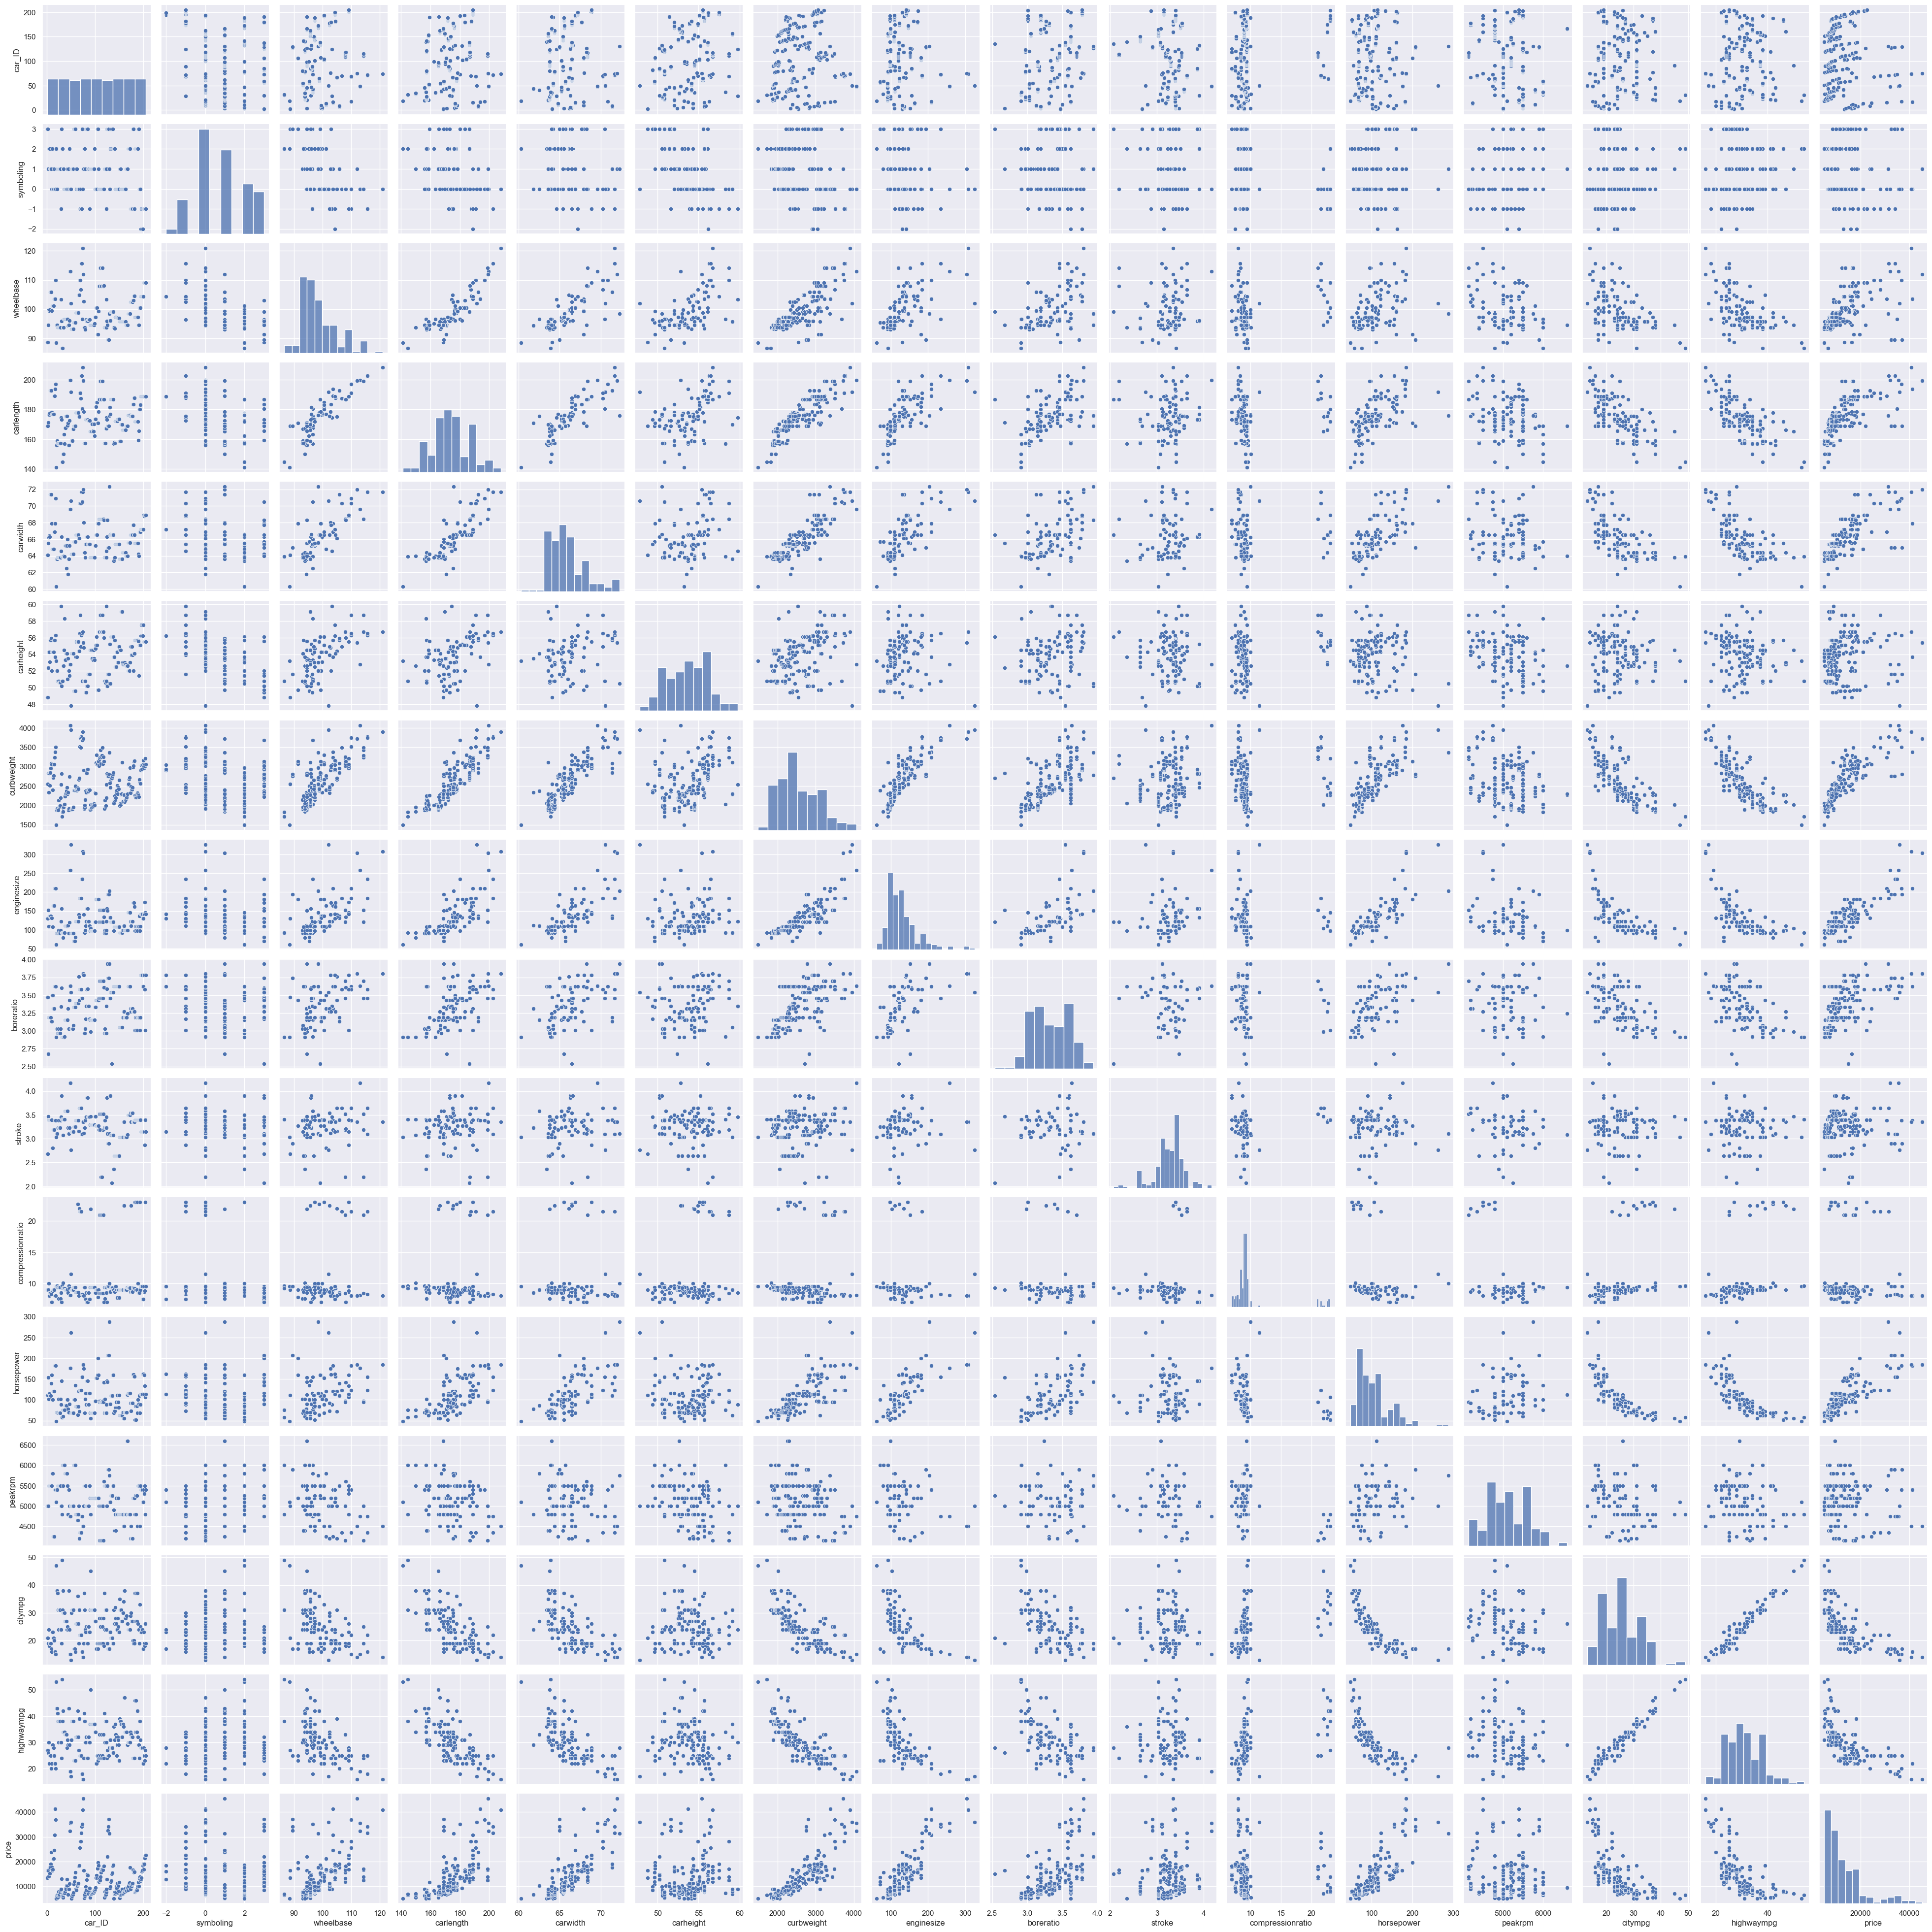

In [34]:
sns.pairplot(car)

In [22]:
from scipy.stats import shapiro
from scipy.stats import skew

In [23]:
# Vemos si los datos del target están dentro de la normalidad
print("Saphiro:", shapiro(car["price"]).pvalue)
print("Asimetria:", skew(car["price"]))

Saphiro: 1.8491777441833604e-15
Asimetria: 1.7646442265113236


C:\Users\arica\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='price', ylabel='Density'>

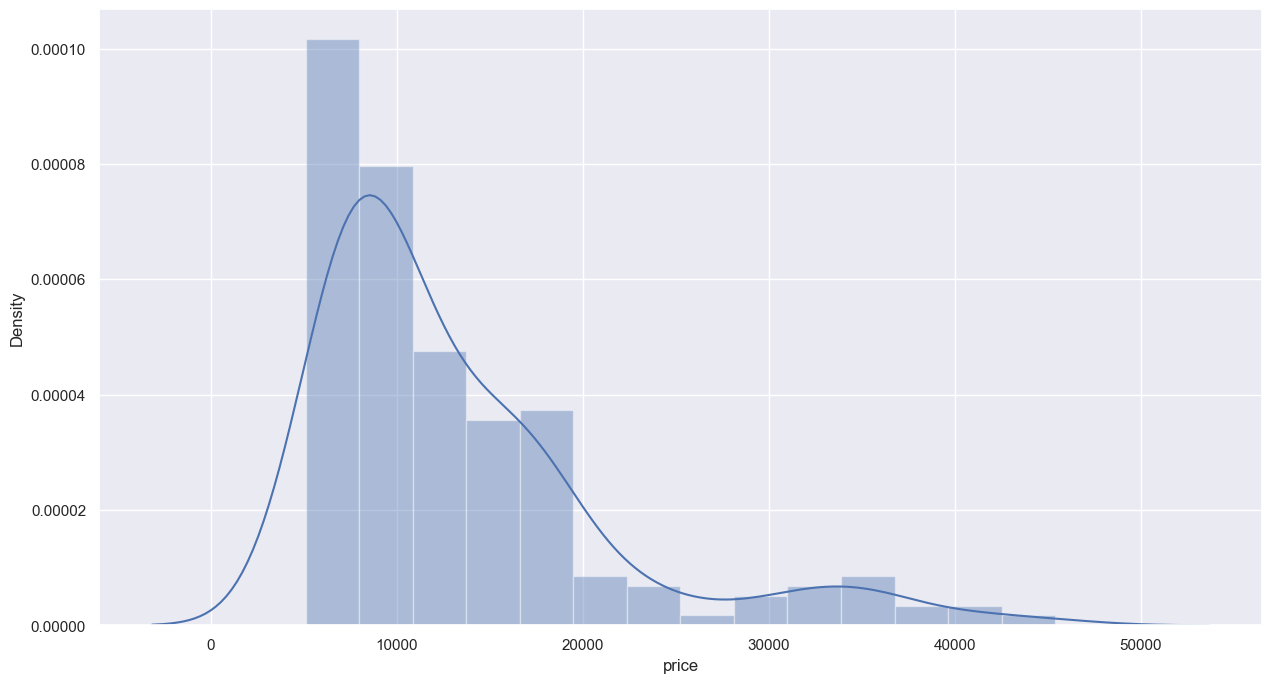

In [24]:
# Vemos si los datos del target están dentro de la normalidad
sns.distplot(car["price"])

In [25]:
# Features que elijo en base a la correlación
x = car[["horsepower", "enginesize", "curbweight", "carwidth"]]
x

,horsepower,enginesize,curbweight,carwidth
0,111,130,2548,64.1
1,111,130,2548,64.1
2,154,152,2823,65.5
3,102,109,2337,66.2
4,115,136,2824,66.4
...,...,...,...,...
200,114,141,2952,68.9
201,160,141,3049,68.8
202,134,173,3012,68.9
203,106,145,3217,68.9


In [26]:
# target
y = car[["price"]]
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [27]:
#Partimos en train y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [28]:
#Vemos cuantos features ha cogido para train y cuantas para test
print("Total features shape:", x.shape)
print("Train features shape:", x_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (205, 4)
Train features shape: (164, 4)
Train target shape: (164, 1)
Test features shape: (41, 4)
Test target shape: (41, 1)


In [29]:
#Creamos el algoritmo
from sklearn.linear_model import LinearRegression
car_reg = LinearRegression()

In [30]:
#Entrenamos el modelo
car_reg.fit(x_train, y_train)

LinearRegression()

In [31]:
# Sacamos intercept y coeficiente para evaluar el modelo
print(car_reg.intercept_)
print(car_reg.coef_)

[-48568.71695195]
[[ 53.57021247  78.24445184   2.06160804 622.27021234]]


In [45]:
#Intento sacar los coeficientes en bonito pero NO ME DEJA NO SÉ PORQUÉ
coef = pd.DataFrame(car_reg.coef_,
                        x.columns,
                        columns=['Coefficient'])
coef

ValueError: Shape of passed values is (1, 4), indices imply (4, 1)

In [33]:
x.columns

Index(['horsepower', 'enginesize', 'curbweight', 'carwidth'], dtype='object')

In [37]:
#Hacemos las prediciones 
predict = car_reg.predict(x_test)
predict

array([[25823.02332068],
       [18798.77699226],
       [11334.76742652],
       [13652.30837798],
       [23815.77993835],
       [ 6599.12018528],
       [ 7802.46460977],
       [ 7335.19707722],
       [10675.00343923],
       [ 7226.64060698],
       [15081.06806466],
       [ 7218.23190669],
       [15450.48629923],
       [12263.2566441 ],
       [38044.53888245],
       [ 5681.6514918 ],
       [ -633.86862651],
       [18502.14899316],
       [11345.92408828],
       [10437.9185149 ],
       [11826.44851215],
       [21497.84712486],
       [ 6557.88802453],
       [ 5031.44607823],
       [ 5917.43609645],
       [26754.53473867],
       [15118.28157717],
       [16642.23203551],
       [ 6617.67465762],
       [16390.71585492],
       [23331.30204951],
       [ 5872.08071962],
       [ 6248.59370215],
       [21229.96272809],
       [ 8686.38978918],
       [23290.06988875],
       [11699.08549336],
       [ 8108.76621743],
       [ 5735.19383592],
       [18693.87854067],


<AxesSubplot:ylabel='price'>

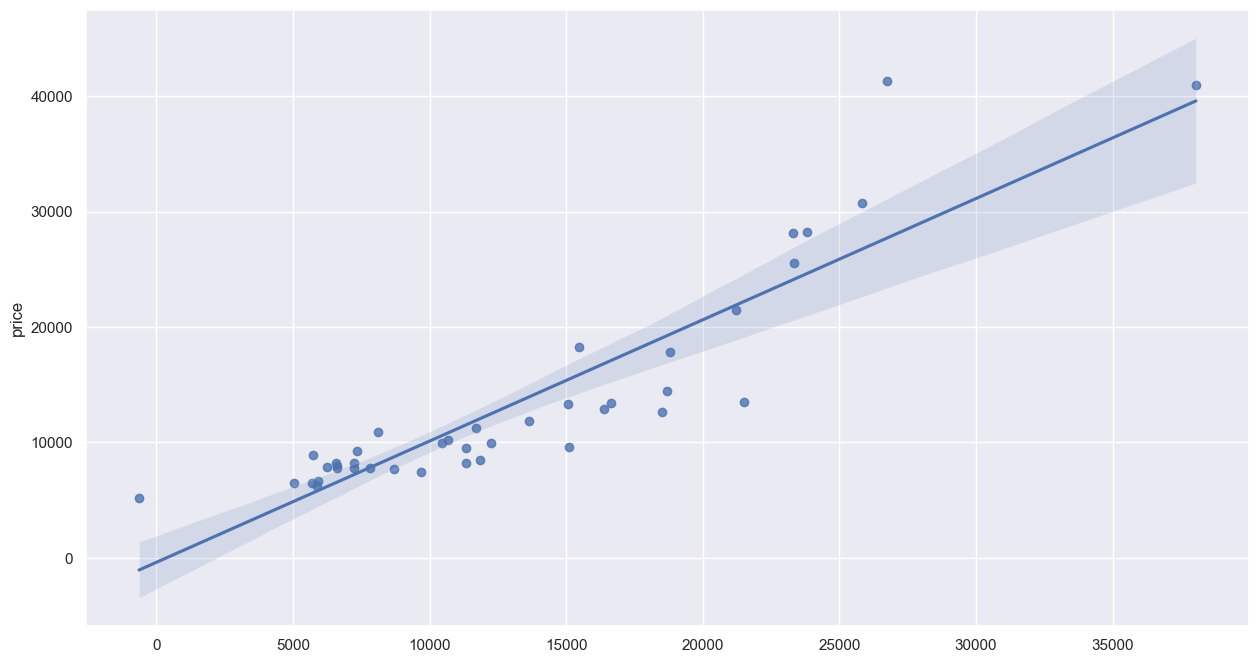

In [38]:
#Pintamos la regresión lineal
sns.regplot(data=y_test, y= y_test["price"], x= predict)

In [43]:
# Evaluamos el modelo con las métricas de regresión
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test,predict))
print("R2 Score:", car_reg.score(x_test, y_test))

MAE: 2721.5632883619915
MSE: 14203294.999366539
RMSE: 3768.725911945115
MAPE: 0.22168858369829492
R2 Score: 0.8200839678407305


In [46]:
car_reg.coef_

array([[ 53.57021247,  78.24445184,   2.06160804, 622.27021234]])

In [51]:
#Feature importance para hacer el modelo con solo una variable
from sklearn.feature_selection import SelectKBest
names = x.columns
print(x.shape)
sel = SelectKBest(k="all")
X_new = sel.fit_transform(x, y)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)

(205, 4)
(205, 4)
[17.35176432 40.73817399 36.89334129 18.60420579]


c:\Users\arica\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,column,score
1,enginesize,40.738174
2,curbweight,36.893341
3,carwidth,18.604206
0,horsepower,17.351764


In [52]:
# Mismo proceso anterior pero en un modelo con solo una feature. Seleccionamos feature y target.
x_1 = car[["enginesize"]]
y_1 = car[["price"]]

In [53]:
#Partimos en train y test
from sklearn.model_selection import train_test_split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size = 0.20, random_state = 42)

In [54]:
#Vemos cuantos features ha cogido para train y cuantas para test
print("Total features shape:", x_1.shape)
print("Train features shape:", x_train_1.shape)
print("Train target shape:", y_train_1.shape)
print("Test features shape:", x_test_1.shape)
print("Test target shape:", y_test_1.shape)

Total features shape: (205, 1)
Train features shape: (164, 1)
Train target shape: (164, 1)
Test features shape: (41, 1)
Test target shape: (41, 1)


In [55]:
#Creamos el algoritmo
from sklearn.linear_model import LinearRegression
car_lr = LinearRegression()

In [56]:
#Entrenamos el modelo
car_lr.fit(x_train_1, y_train_1)

LinearRegression()

In [57]:
# Sacamos intercept y coeficiente para evaluar el modelo
print(car_lr.intercept_)
print(car_lr.coef_)

[-7741.76506717]
[[165.84456256]]


In [58]:
#Hacemos las prediciones 
pred = car_lr.predict(x_test_1)
pred

array([[26919.74850809],
       [13983.87262833],
       [12159.58244016],
       [12325.42700272],
       [22607.7898815 ],
       [ 8345.15750125],
       [10501.13681455],
       [ 8511.00206381],
       [10169.44768942],
       [ 8345.15750125],
       [14813.09544113],
       [ 8511.00206381],
       [15476.47369138],
       [12491.27156528],
       [43338.36020163],
       [ 7515.93468845],
       [ 2374.75324906],
       [18129.98669235],
       [12491.27156528],
       [10169.44768942],
       [12491.27156528],
       [22276.10075638],
       [ 8345.15750125],
       [ 7515.93468845],
       [ 7184.24556333],
       [26919.74850809],
       [16471.54106674],
       [15642.31825394],
       [ 8345.15750125],
       [15642.31825394],
       [22607.7898815 ],
       [ 7184.24556333],
       [ 7515.93468845],
       [20949.34425589],
       [ 8511.00206381],
       [22607.7898815 ],
       [10169.44768942],
       [ 3867.35431211],
       [ 7184.24556333],
       [18129.98669235],


<AxesSubplot:ylabel='price'>

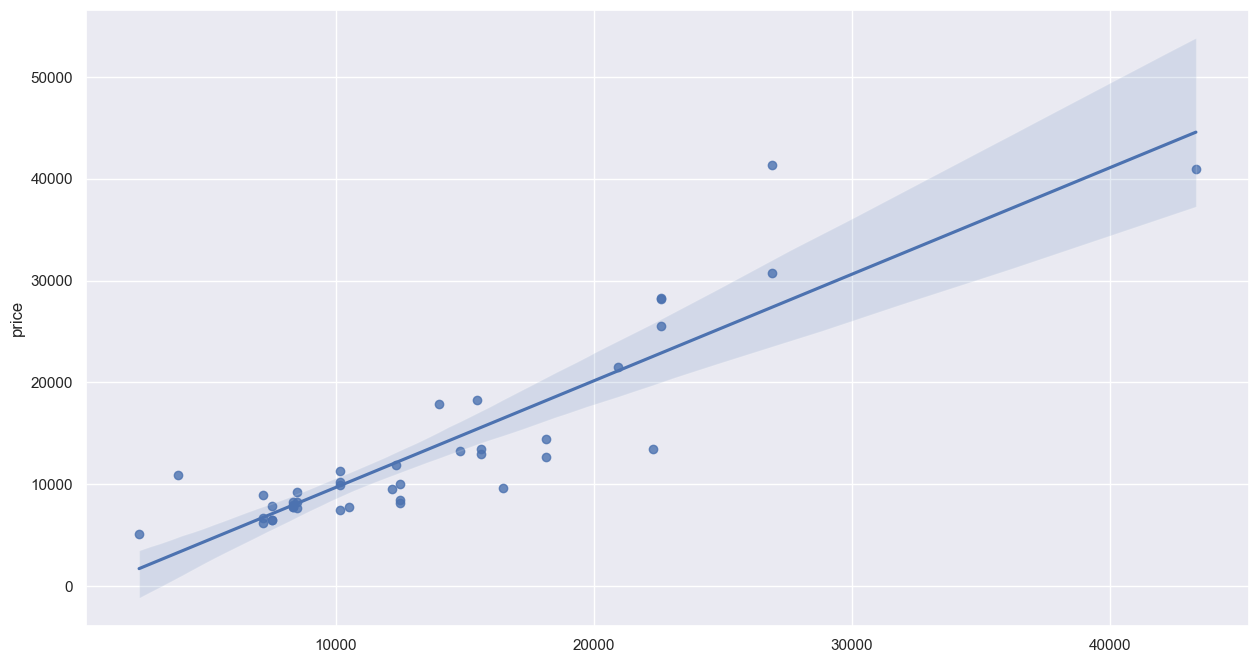

In [59]:
#Pintamos la regresión lineal
sns.regplot(data=y_test_1, y= y_test_1["price"], x= pred)

In [61]:
# Evaluamos el modelo con las métricas de regresión
print('MAE:', metrics.mean_absolute_error(y_test_1, pred))
print('MSE:', metrics.mean_squared_error(y_test_1, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_1, pred)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test_1,pred))
print("R2 Score:", car_lr.score(x_test_1, y_test_1))

MAE: 2748.6947032901094
MSE: 15465458.96590847
RMSE: 3932.614774664367
MAPE: 0.21361884134206255
R2 Score: 0.8040958796678975


In [ ]:
#Parece mejor el modelo con más variables, tiene menos errores y mejor score

In [62]:
xpol = car[["horsepower", "enginesize", "curbweight", "carwidth"]]
xpol

,horsepower,enginesize,curbweight,carwidth
0,111,130,2548,64.1
1,111,130,2548,64.1
2,154,152,2823,65.5
3,102,109,2337,66.2
4,115,136,2824,66.4
...,...,...,...,...
200,114,141,2952,68.9
201,160,141,3049,68.8
202,134,173,3012,68.9
203,106,145,3217,68.9


In [64]:
ypol = car[["price"]]

In [65]:
#Probando otro modelo de regresión (polinómica).
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xpol, ypol,test_size = 0.20, random_state = 42)

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(xpol)
x_poly = poly_reg.transform(xpol)


In [69]:
pol_reg = LinearRegression()
pol_reg.fit(x_poly, ypol)

LinearRegression()

In [76]:
pol_reg.predict(X_test)

c:\Users\arica\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: X has 4 features, but LinearRegression is expecting 15 features as input.

In [72]:
pol_reg.coef_

array([[ 0.00000000e+00,  2.03651571e+03, -7.61849789e+01,
        -7.55146622e+01, -2.90823940e+04,  1.02250087e+00,
        -1.05486779e+00,  2.57304246e-02, -3.23367505e+01,
         5.59920998e-01,  1.46552454e-02,  8.20481305e-01,
        -3.34339541e-03,  1.39355865e+00,  2.18987790e+02]])

In [75]:
pol_reg.score(x_poly,ypol)

0.8707467758172913

In [ ]:
# BUENO ME HE HECHO LA PICHA UN LÍO HACIENDO EL POLINOMIAL 